In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

selector = 'approximate = 1 & sample = 0 & eps = 0.05 & tau = 1. & phi = .4'
path = '/home/jakob/Project_Divestment/PyDivestment/output_data/test_output/P3o1/micro/'
#path = '/home/jakob/Project_Divestment/PyDivestment/output_data/P3/micro/'
data = []
measures = ['mean', 'std']

for m in measures:
    with pd.HDFStore(path + f'{m}.h5') as store:
        data.append(store.select('dat', selector))
for d in data:
    d.index = d.index.droplevel('eps').droplevel('tau').droplevel('test').droplevel('sample').droplevel('approximate').droplevel('phi')
    d.columns = [f'${var}$' for var in d.columns]
    tvals = d.index.values
    t0 = tvals[0] #+ 80
    new_times = {t: t-t0 for t in tvals}
    d.rename(mapper=new_times,
             axis='index',
             level='tstep',
             inplace=True)
    
def plotfunc(variables, colors, data, ax):
    lns = []
    for i, var in enumerate(variables):
        
        ln = ax.plot(data[0].index.values, data[0][var].values, color=colors[i], label=var)[0]
        lns.append(ln)
        upper_limit = np.transpose(data[0][[var]].values \
                                   + data[1][[var]].values)[0]
        lower_limit = np.transpose(data[0][[var]].values \
                                   - data[1][[var]].values)[0]
        ax.fill_between(data[0].index.values,
                                 upper_limit, lower_limit,
                                 color='k',
                                 alpha=0.05)
        ax.plot(data[0].index.values,
                                 upper_limit,
                                 color=colors[i],
                                 alpha=0.2)
        ax.plot(data[0].index.values,
                                 lower_limit,
                                 color=colors[i],
                                 alpha=0.2)
        ax.set_xlim([0, 300])
    print(lns)
    return lns

[<matplotlib.lines.Line2D object at 0x7fe0fc174278>, <matplotlib.lines.Line2D object at 0x7fe0fc111080>]
[<matplotlib.lines.Line2D object at 0x7fe0fc07e668>, <matplotlib.lines.Line2D object at 0x7fe0fc00d5c0>]


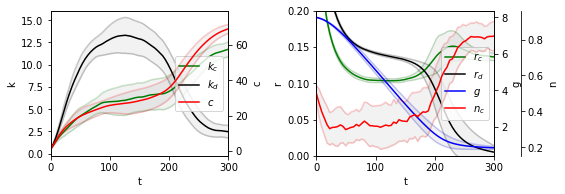

In [3]:
colors = ['g', 'k']
variables = ['$k_c$', '$k_d$']

fig = plt.figure(figsize=(8, 2.8))
ax = fig.add_subplot(121)

lns1 = plotfunc(variables, colors, data, ax)

axb = ax.twinx()

lns2 = plotfunc(['$c$'], ['r'], data, axb)

lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc='center right')

ax2 = fig.add_subplot(122)

lns3 = plotfunc(variables=['$r_c$', '$r_d$'], 
                colors=['g', 'k'], data=data, ax=ax2)
ax2.set_ylim([0., 0.2])

ax2b = ax2.twinx()

lns4 = plotfunc(variables=['$g$'],
                colors=['b'], data=data, ax=ax2b)

ax2c = ax2.twinx()
ax2c.spines["right"].set_position(("axes", 1.15))

lns5 = plotfunc(variables=['$n_c$'],
                colors=['r'], data=data, ax=ax2c)

lns = lns3+lns4+lns5
labs = [l.get_label() for l in lns]
ax2.legend(lns, labs, loc='center right')

ax.set_ylabel('k')
axb.set_ylabel('c')
ax2.set_ylabel('r')
ax2b.set_ylabel('g')
ax2c.set_ylabel('n')
ax.set_xlabel('t')
ax2.set_xlabel('t')


plt.tight_layout()
fig.savefig('example_trajectory.pdf')

[<matplotlib.lines.Line2D object at 0x7fe0f6ab7a90>, <matplotlib.lines.Line2D object at 0x7fe0f6b25208>]
[<matplotlib.lines.Line2D object at 0x7fe0f698e320>, <matplotlib.lines.Line2D object at 0x7fe0f838ac50>]
[<matplotlib.lines.Line2D object at 0x7fe0f6b01b38>, <matplotlib.lines.Line2D object at 0x7fe0f6b059b0>]


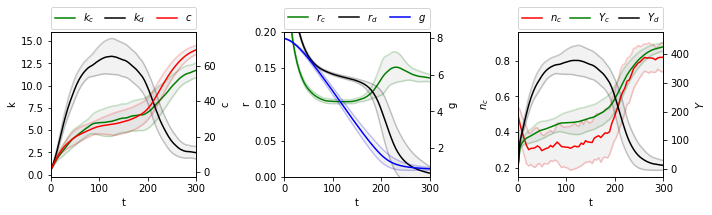

In [9]:
colors = ['g', 'k']
variables = ['$k_c$', '$k_d$']

fig = plt.figure(figsize=(10, 2.8))
ax = fig.add_subplot(131)

lns1 = plotfunc(variables, colors, data, ax)

axb = ax.twinx()

lns2 = plotfunc(['$c$'], ['r'], data, axb)

lns = lns1+lns2
labs = [l.get_label() for l in lns]
#ax.legend(lns, labs, loc='center right')
lgd1 = ax.legend(lns, labs,
          bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
          ncol=3, mode="expand", borderaxespad=0.)

ax2 = fig.add_subplot(132)

lns3 = plotfunc(variables=['$r_c$', '$r_d$'], 
                colors=['g', 'k'], data=data, ax=ax2)
ax2.set_ylim([0., 0.2])

ax2b = ax2.twinx()

lns4 = plotfunc(variables=['$g$'],
                colors=['b'], data=data, ax=ax2b)

lns = lns3+lns4
labs = [l.get_label() for l in lns]
lgd2 = ax2.legend(lns, labs,
          bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
          ncol=3, mode="expand", borderaxespad=0.)

ax3 = fig.add_subplot(133)

lns5 = plotfunc(variables=['$n_c$'],
                colors=['r'], data=data, ax=ax3)

ax3b = ax3.twinx()

lns6 = plotfunc(variables=['$Y_c$', '$Y_d$'],
               colors=['g', 'k'], 
               data=data,
               ax=ax3b)

lns = lns5+lns6
labs = [l.get_label() for l in lns]
lgd3 = ax3.legend(lns, labs,
          bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
          ncol=3, mode="expand", borderaxespad=0.)

ax.set_ylabel('k')
axb.set_ylabel('c')
ax2.set_ylabel('r')
ax2b.set_ylabel('g')
ax2c.set_ylabel('n')
ax.set_xlabel('t')
ax2.set_xlabel('t')
ax3.set_xlabel('t')
ax3.set_ylabel('$n_c$')
ax3b.set_ylabel('$Y$')

plt.tight_layout()

fig.savefig('example_trajectory.pdf', bbox_extra_artists=(lgd1, lgd2, lgd3, ), bbox_inches='tight')

In [5]:
d = data[0]
d['total_capital'] = (d['$k_c$'] + d['$k_d$'])

In [6]:
d[['total_capital', '$k_c$', '$k_d$']]

,total_capital,$k_c$,$k_d$
tstep,,,
0.0,1.000024,0.500012,0.500012
4.5,2.015491,0.952028,1.063463
9.0,3.228110,1.395659,1.832451
13.5,4.546631,1.810785,2.735845
18.0,5.907815,2.166238,3.741577
22.5,7.254314,2.471548,4.782766
27.0,8.558626,2.782008,5.776618
31.5,9.789776,3.098233,6.691543
36.0,10.934327,3.408001,7.526326
